Implement a nearest-neighbor heuristic for the TSP.
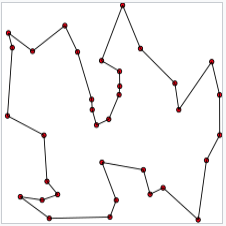

In [1]:
import networkx as nx

n = 20                     # number of cities
G = nx.complete_graph(20)  # graph with a vertex for each city

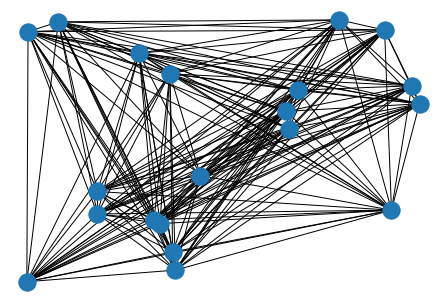

In [2]:
# for convenience, pick the city (x,y)-coordinates at random
import random

my_pos = { i : ( random.random(), random.random() ) for i in G.nodes } # pos[i] = (x_i, y_i)
nx.draw(G, pos=my_pos)

In [3]:
# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

In [4]:
def nearest_neighbor_heuristic(G):
    tour = [ 0 ]    # wlog, start tour at node 0
    while len(tour) < n:
        i = tour[-1]   # last node of tour
        min_length = min( G.edges[i,j]['length'] for j in G.neighbors(i) if j not in tour )
        nearest_neighbors = [ j for j in G.neighbors(i) if j not in tour and G.edges[i,j]['length'] == min_length ]
        tour.append( nearest_neighbors[0] )
    return tour

In [5]:
tour = nearest_neighbor_heuristic(G)
print(tour)

tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
print(tour_edges)

[0, 16, 5, 2, 9, 14, 13, 19, 18, 7, 4, 15, 3, 6, 12, 10, 8, 11, 17, 1]
[(1, 0), (0, 16), (16, 5), (5, 2), (2, 9), (9, 14), (14, 13), (13, 19), (19, 18), (18, 7), (7, 4), (4, 15), (15, 3), (3, 6), (6, 12), (12, 10), (10, 8), (8, 11), (11, 17), (17, 1)]


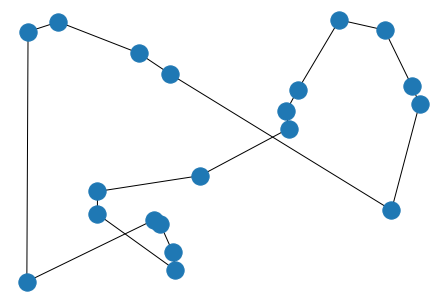

In [6]:
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)